In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import matplotlib.pyplot as plt
import scipy
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import pickle

In [3]:
dataf = pd.read_csv("Data/features_3_sec.csv")
dataf.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


We have genres :
* Rock
* Clasical
* Disco
* Hip-Hop
* Jazz
* Blues
* Metal
* Pop
* Country
* Reggae

Total 10

In [4]:
dataf.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock
9989,rock.00099.9.wav,66149,0.369293,0.086759,0.050524,0.000067,1634.330126,411429.169769,1867.422378,119722.211518,...,38.801735,-11.598399,58.983097,-0.178517,55.761299,-6.903252,39.485901,-3.412534,31.727489,rock


In [5]:
dataf.shape

(9990, 60)

In [6]:
dataf.describe()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [7]:
# removing filename column
dataf = dataf.drop(labels='filename',axis=1)

In [8]:
sample_audio = "Data/genres_original/pop/pop.00003.wav"
sample, sample_rate = librosa.load(sample_audio)


ipd.Audio(sample, rate=sample_rate)

In [9]:
sample, sample_rate = librosa.load(sample_audio, sr=16000)
print(len(sample),sample_rate)

480003 16000


<class 'numpy.ndarray'> 16000


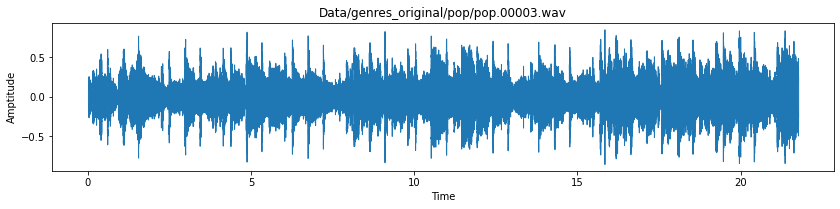

In [10]:
print(type(sample),sample_rate)
sample, sample_rate = librosa.load(sample_audio, sr=16000)

# plotting raw wave Files, here it is for Pop genre
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
ax1.set_title("Data/genres_original/pop/pop.00003.wav")
ax1.set_xlabel('time')
ax1.set_ylabel('Amptitude')
librosa.display.waveshow(sample)
plt.show()

C:\Users\sarth\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


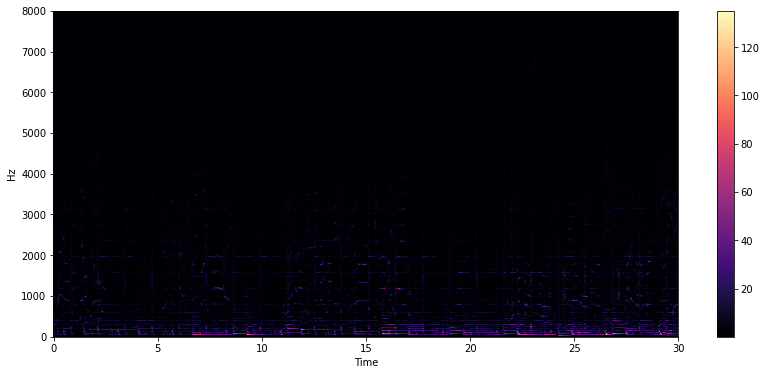

In [11]:
# Spectrogram, we have this in images folder
# way of representing signal loudness at diff freq
# also known as Sonographs
# when data is 3D then waterfall

stft = librosa.stft(sample)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()

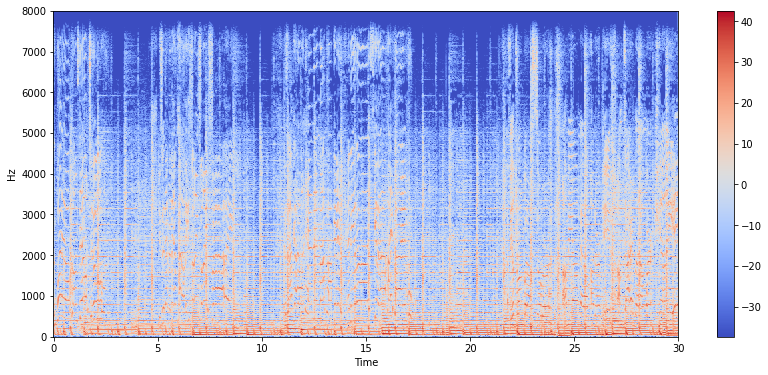

In [12]:
stft = librosa.stft(sample)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()

C:\Users\sarth\AppData\Local\Temp\ipykernel_15932\3751027512.py:4: FutureWarning: Pass y=[-0.00914291 -0.01204665  0.00553881 ... -0.28402796 -0.3947764
  0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(sample+0.01,sr=sample_rate)[0]


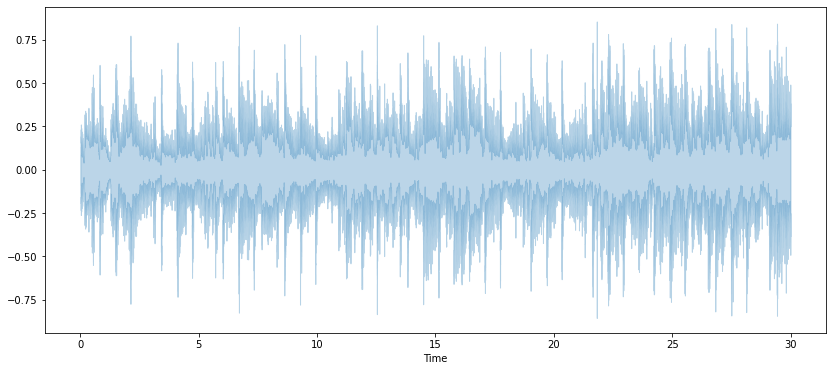

In [13]:
# Rolloff - feq below which a specified percentage of the total spectral lies / 85%
from sklearn.preprocessing import normalize

spectral_rolloff = librosa.feature.spectral_rolloff(sample+0.01,sr=sample_rate)[0]
plt.figure(figsize=(14,6))
librosa.display.waveshow(sample,sr=sample_rate,alpha=0.3)

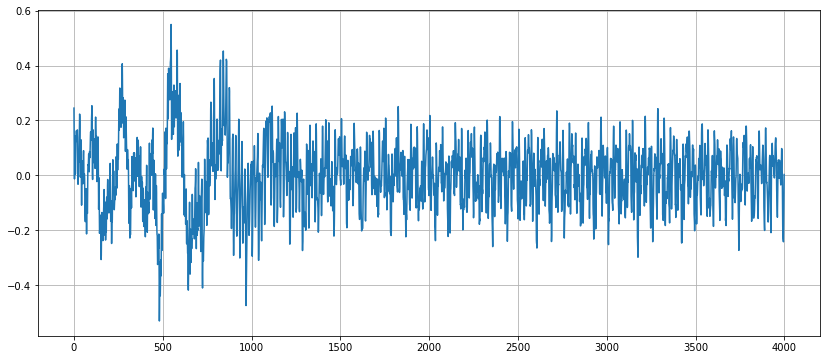

In [14]:
# Zero crossing 
plt.figure(figsize=(14,6))
plt.plot(sample[8000:12000])
plt.grid()

In [15]:
#count
zero_cross = librosa.zero_crossings(sample[8000:12000],pad=False)
print("Count {}".format(sum(zero_cross)))

Count 500


In [16]:
#feature extraction
class_list = dataf.iloc[:,-1] 
convert = LabelEncoder()


In [17]:
y = convert.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [18]:
dataf.iloc[:,:-1]

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [19]:
# scaling features
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(dataf.iloc[:,:-1],dtype=float))

In [20]:
# dividing into training and test Data
X_train,x_test, Y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
print(len(Y_train),len(y_test))

7992 1998


In [22]:
# Using CNN algorithm
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
# building model

model = Sequential()

model.add(Dense(512,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [25]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
modelcheck = ModelCheckpoint('best_model.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [26]:
history = model.fit(X_train,Y_train, validation_data=(x_test,y_test), epochs=600, callbacks=[earlystop,modelcheck], batch_size=128)

Epoch 1/600
53/63 [========================>.....] - ETA: 0s - loss: 1.6760 - accuracy: 0.4042
Epoch 1: val_accuracy improved from -inf to 0.60360, saving model to best_model.hdf5
63/63 [==============================] - 1s 8ms/step - loss: 1.6258 - accuracy: 0.4233 - val_loss: 1.1354 - val_accuracy: 0.6036
Epoch 2/600
54/63 [========================>.....] - ETA: 0s - loss: 1.1032 - accuracy: 0.6191
Epoch 2: val_accuracy improved from 0.60360 to 0.70521, saving model to best_model.hdf5
63/63 [==============================] - 0s 6ms/step - loss: 1.0966 - accuracy: 0.6225 - val_loss: 0.8615 - val_accuracy: 0.7052
Epoch 3/600
55/63 [=========================>....] - ETA: 0s - loss: 0.8888 - accuracy: 0.7033
Epoch 3: val_accuracy improved from 0.70521 to 0.75475, saving model to best_model.hdf5
63/63 [==============================] - 0s 6ms/step - loss: 0.8857 - accuracy: 0.7025 - val_loss: 0.7110 - val_accuracy: 0.7548
Epoch 4/600
56/63 [=========================>....] - ETA: 0s - loss

63/63 [==============================] - 0s 5ms/step - loss: 0.1253 - accuracy: 0.9602 - val_loss: 0.3285 - val_accuracy: 0.9159
Epoch 29/600
57/63 [==========================>...] - ETA: 0s - loss: 0.1054 - accuracy: 0.9659
Epoch 29: val_accuracy improved from 0.91842 to 0.92092, saving model to best_model.hdf5
63/63 [==============================] - 0s 6ms/step - loss: 0.1053 - accuracy: 0.9660 - val_loss: 0.3140 - val_accuracy: 0.9209
Epoch 30/600
57/63 [==========================>...] - ETA: 0s - loss: 0.1063 - accuracy: 0.9663
Epoch 30: val_accuracy did not improve from 0.92092
63/63 [==============================] - 0s 5ms/step - loss: 0.1035 - accuracy: 0.9670 - val_loss: 0.3032 - val_accuracy: 0.9184
Epoch 31/600
59/63 [===========================>..] - ETA: 0s - loss: 0.0961 - accuracy: 0.9678
Epoch 31: val_accuracy did not improve from 0.92092
63/63 [==============================] - 0s 5ms/step - loss: 0.0958 - accuracy: 0.9678 - val_loss: 0.3191 - val_accuracy: 0.9179
Epo

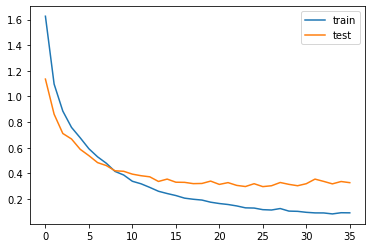

In [27]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [28]:
from keras.models import load_model
Model = load_model("./best_model.hdf5")

In [29]:
test_loss, test_accuracy = model.evaluate(x_test,y_test,batch_size=128)
print("Test loss : ",test_loss)
print("\nBest test accuracy : ",test_accuracy*100)

16/16 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.9144
Test loss :  0.32720401883125305

Best test accuracy :  91.44144058227539
